In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm
from sklearn.metrics import *
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [77]:
import team_method

instance = team_method.character_stat()
instance.set_all( 100, 150)
instance.print1()

HP :  100
MP :  150


# Function

In [138]:
# #df_merge.columns 0,1,3:18,19:26
col_list = list(df_merge.columns)
col_list.remove('date_x')
col_list.remove('date_y')

['people_id',
 'activity_id',
 'activity_category',
 'char_1_x',
 'char_2_x',
 'char_3_x',
 'char_4_x',
 'char_5_x',
 'char_6_x',
 'char_7_x',
 'char_8_x',
 'char_9_x',
 'char_10_x',
 'outcome',
 'char_1_y',
 'group_1',
 'char_2_y',
 'char_3_y',
 'char_4_y',
 'char_5_y',
 'char_6_y',
 'char_7_y',
 'char_8_y',
 'char_9_y',
 'char_10_y',
 'char_11',
 'char_12',
 'char_13',
 'char_14',
 'char_15',
 'char_16',
 'char_17',
 'char_18',
 'char_19',
 'char_20',
 'char_21',
 'char_22',
 'char_23',
 'char_24',
 'char_25',
 'char_26',
 'char_27',
 'char_28',
 'char_29',
 'char_30',
 'char_31',
 'char_32',
 'char_33',
 'char_34',
 'char_35',
 'char_36',
 'char_37',
 'char_38']

In [2]:
# modify dtype 
def str_to_num(df, tain=True):
    col_list = list(df_merge.columns)
    col_list.remove('date_x')
    col_list.remove('date_y')
    
    df.replace(['ppl_', 'group ', 'type '], ['', '', ''], regex=True, inplace = True)
    df = df.apply(pd.to_numeric, errors='ignore')
    
    for col in columns[1:]:
        data[col] = data[col].fillna('type 0')
        data[col] = data[col].apply(lambda x: x.split(' ')[1])
        data[col] = pd.to_numeric(data[col]).astype(int)
    return df


def num_to_cat(df, columns, train=True):
    pass
   
# add past_says and week
def date_modify(df, train=True):
    pass

In [ ]:
def preprocess_acts(data, train_set=True):
    
    # Getting rid of data feature for now
    data = data.drop(['date', 'activity_id'], axis=1)
    if(train_set):
        data = data.drop(['outcome'], axis=1)
    
    ## Split off _ from people_id
    data['people_id'] = data['people_id'].apply(lambda x: x.split('_')[1])
    data['people_id'] = pd.to_numeric(data['people_id']).astype(int)
    
    columns = list(data.columns)
    
    # Convert strings to ints
    for col in columns[1:]:
        data[col] = data[col].fillna('type 0')
        data[col] = data[col].apply(lambda x: x.split(' ')[1])
        data[col] = pd.to_numeric(data[col]).astype(int)
    return data

# data load & 전처리

### train data

In [84]:
df_train = pd.read_csv('./data/act_train.csv', parse_dates=['date'])
df_people = pd.read_csv('./data/people.csv', parse_dates=['date'])
df_merge = pd.merge(df_train, df_people, on='people_id')

In [4]:
df_date_x = df_merge['date_x'].copy()
df_date_y = df_merge['date_y'].copy()

In [5]:
df_merge.drop(['date_x', 'date_y'], axis=1, inplace=True)

In [6]:
idx1 = df_merge.activity_id[df_merge.activity_id.str.contains('^act1')].index
idx2 = df_merge.activity_id[df_merge.activity_id.str.contains('^act2')].index
df_merge.activity_id.loc[idx1] = 1
df_merge.activity_id.loc[idx2] = 2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
df_merge.replace(['ppl_', 'group ', 'type '], ['', '', ''], regex=True, inplace = True)

In [8]:
df_merge = df_merge.apply(pd.to_numeric, errors='ignore')

##### add Past days, week

In [9]:
df_merge.insert(loc=2 ,column='date_x', value=df_date_x)
# df_merge.insert(loc=3 ,column='Past_dayss_x', value=(df_merge['date_x'] - pd._libs.tslib.Timestamp('2022-07-17 00:00:00')))
df_merge.insert(loc=3 ,column='week_x', value=df_merge['date_x'].dt.weekday)
# df_merge.insert(loc=3 ,column='date_year_x', value=df_date_x.dt.year)
# df_merge.insert(loc=4 ,column='date_month_x', value=df_date_x.dt.month)
# df_merge.insert(loc=5 ,column='date_day_x', value=df_date_x.dt.day)
# df_merge['Past_dayss_x']=(pd.to_numeric(df_merge['Past_dayss_x'])/86400000000000).astype(int)

df_merge.insert(loc=18 ,column='date_y', value=df_date_y)
# df_merge.insert(loc=19 ,column='Past_dayss_y', value=(df_merge['date_y'] - pd._libs.tslib.Timestamp('2020-05-18 00:00:00')))
df_merge.insert(loc=19 ,column='week_y', value=df_merge['date_y'].dt.weekday)
# df_merge.insert(loc=19 ,column='date_year_y', value=df_date_y.dt.year)
# df_merge.insert(loc=20 ,column='date_month_y', value=df_date_y.dt.month)
# df_merge.insert(loc=21 ,column='date_day_y', value=df_date_y.dt.day)
# df_merge['Past_dayss_y']=(pd.to_numeric(df_merge['Past_dayss_y'])/86400000000000).astype(int)

df_merge.insert(loc=4 ,column='Past_days', value=(df_merge.date_x - df_merge.date_y).astype('timedelta64[D]'))

### test data

In [10]:
# df_test = pd.read_csv('./data/act_test.csv', parse_dates=['date'])
# df_merge_test = pd.merge(df_test, df_people, how='inner', on='people_id')
# df_date_x_test = df_merge_test['date_x'].copy()
# df_date_y_test = df_merge_test['date_y'].copy()

# df_merge_test.drop(['date_x', 'date_y'], axis=1, inplace=True)

# df_merge_test = df_merge_test.replace('type ', '', regex=True).apply(pd.to_numeric, errors='ignore')

# idx1_test = df_merge_test.activity_id[df_merge_test.activity_id.str.contains('^act1')].index
# idx2_test = df_merge_test.activity_id[df_merge_test.activity_id.str.contains('^act2')].index
# df_merge_test.activity_id.loc[idx1_test] = 1
# df_merge_test.activity_id.loc[idx2_test] = 2

# df_merge_test.insert(loc=2 ,column='date_x', value=df_date_x_test)
# # df_merge_test.insert(loc=3 ,column='Past_dayss_x', value=(df_merge_test['date_x'] - pd._libs.tslib.Timestamp('2022-07-17 00:00:00')))
# df_merge_test.insert(loc=3 ,column='week_x', value=df_merge_test['date_x'].dt.weekday)
# # df_merge_test.insert(loc=3 ,column='date_year_x', value=df_date_x_test.dt.year)
# # df_merge_test.insert(loc=4 ,column='date_month_x', value=df_date_x_test.dt.month)
# # df_merge_test.insert(loc=5 ,column='date_day_x', value=df_date_x_test.dt.day)

# df_merge_test.insert(loc=18 ,column='date_y', value=df_date_y_test)
# # df_merge_test.insert(loc=19 ,column='Past_dayss_y', value=(df_merge_test['date_y'] - pd._libs.tslib.Timestamp('2020-05-18 00:00:00')))
# df_merge_test.insert(loc=19 ,column='week_y', value=df_merge_test['date_y'].dt.weekday)
# # df_merge_test.insert(loc=19 ,column='date_year_y', value=df_date_y_test.dt.year)
# # df_merge_test.insert(loc=20 ,column='date_month_y', value=df_date_y_test.dt.month)
# # df_merge_test.insert(loc=21 ,column='date_day_y', value=df_date_y_test.dt.day)
# df_merge_test['Past_dayss'] = (df_merge_test.date_x - df_merge_test.date_y).astype('timedelta64[D]')

In [11]:
del df_train, df_people, df_date_x, df_date_y, idx1, idx2
# del df_test, df_date_x_test, df_date_y_test, idx1_test, idx2_test

In [12]:
# df_merge.to_csv("train_merge.csv")

In [13]:
# df_merge = pd.read_csv('./train_merge.csv', parse_dates=['date_x', 'date_y'])

In [14]:
df_merge.head()

,people_id,activity_id,date_x,week_x,Past_days,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,outcome,char_1_y,group_1,date_y,week_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,100.0,2,2023-08-26,5,788.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,0,2,17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,100.0,2,2022-09-27,1,455.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
2,100.0,2,2022-09-27,1,455.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
3,100.0,2,2023-08-04,4,766.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
4,100.0,2,2023-08-26,5,788.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,2,17304,2021-06-29,1,2,5,5,5,3,11,2,2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36


# EDA

In [15]:
for d in ['date_x', 'date_y']:
    print('Start of ' + d + ': ' + str(df_merge[d].min().date()))
    print('  End of ' + d + ': ' + str(df_merge[d].max().date()))
    print('Range of ' + d + ': ' + str(df_merge[d].max() - df_merge[d].min()) + '\n')

Start of date_x: 2022-07-17
  End of date_x: 2023-08-31
Range of date_x: 410 days 00:00:00

Start of date_y: 2020-05-18
  End of date_y: 2023-08-31
Range of date_y: 1200 days 00:00:00



In [16]:
df_merge.describe()

,people_id,activity_id,week_x,Past_days,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,outcome,char_1_y,group_1,week_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_38
count,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,157615.000000,2.039676e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06,2.197291e+06
mean,2.023863e+05,1.928268e+00,3.231972e+00,2.593235e+02,2.997433e+00,6.932449,5.188389,3.932145,2.799023,3.579881,2.010443,2.554275,5.275538,7.200761,5.038379e+02,4.439544e-01,1.906321e+00,1.620591e+04,3.142312e+00,2.448956e+00,1.786501e+01,1.223861e+01,5.760739e+00,2.744043e+00,1.077467e+01,3.093629e+00,3.476141e+00,4.998051e+01
std,1.159728e+05,2.580429e-01,1.558017e+00,2.748091e+02,1.314068e+00,6.923220,4.769402,2.150886,1.060304,2.261971,0.815512,1.575641,3.036524,4.936222,1.202242e+03,4.968491e-01,2.913810e-01,9.785621e+03,1.528937e+00,6.593571e-01,1.583957e+01,9.255424e+00,2.724680e+00,1.407350e+00,6.454917e+00,1.548692e+00,1.932350e+00,3.608557e+01
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.032760e+05,2.000000e+00,2.000000e+00,1.700000e+01,2.000000e+00,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000e+00,0.000000e+00,2.000000e+00,9.107000e+03,2.000000e+00,2.000000e+00,5.000000e+00,6.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
50%,2.041670e+05,2.000000e+00,3.000000e+00,1.710000e+02,3.000000e+00,5.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,4.000000,7.000000,2.000000e+00,0.000000e+00,2.000000e+00,1.730400e+04,3.000000e+00,3.000000e+00,1.000000e+01,7.000000e+00,5.000000e+00,3.000000e+00,9.000000e+00,3.000000e+00,3.000000e+00,5.900000e+01
75%,2.997910e+05,2.000000e+00,4.000000e+00,4.230000e+02,4.000000e+00,10.000000,6.000000,5.000000,3.000000,6.000000,3.000000,3.000000,6.000000,10.000000,4.500000e+02,1.000000e+00,2.000000e+00,1.852800e+04,4.000000e+00,3.000000e+00,4.000000e+01,2.500000e+01,9.000000e+00,4.000000e+00,1.600000e+01,3.000000e+00,4.000000e+00,8.200000e+01
max,3.982380e+05,2.000000e+00,6.000000e+00,1.197000e+03,7.000000e+00,52.000000,32.000000,11.000000,7.000000,7.000000,5.000000,8.000000,18.000000,19.000000,9.251000e+03,1.000000e+00,2.000000e+00,5.146200e+04,6.000000e+00,3.000000e+00,4.400000e+01,2.500000e+01,9.000000e+00,7.000000e+00,2.500000e+01,8.000000e+00,9.000000e+00,1.000000e+02


In [17]:
df_merge[['date_x', 'date_y']].describe()

,date_x,date_y
count,2197291,2197291
unique,411,1196
top,2022-09-30 00:00:00,2022-03-02 00:00:00
freq,48174,55371
first,2022-07-17 00:00:00,2020-05-18 00:00:00
last,2023-08-31 00:00:00,2023-08-31 00:00:00


In [18]:
pd.DataFrame(df_merge.people_id, dtype='object').describe()

,people_id
count,2197291.0
unique,151295.0
top,294918.0
freq,55103.0


In [19]:
df_merge.people_id.unique()

array([  1.00000000e+02,   1.00002000e+05,   1.00003000e+05, ...,
         9.99900000e+03,   9.99920000e+04,   9.99940000e+04])

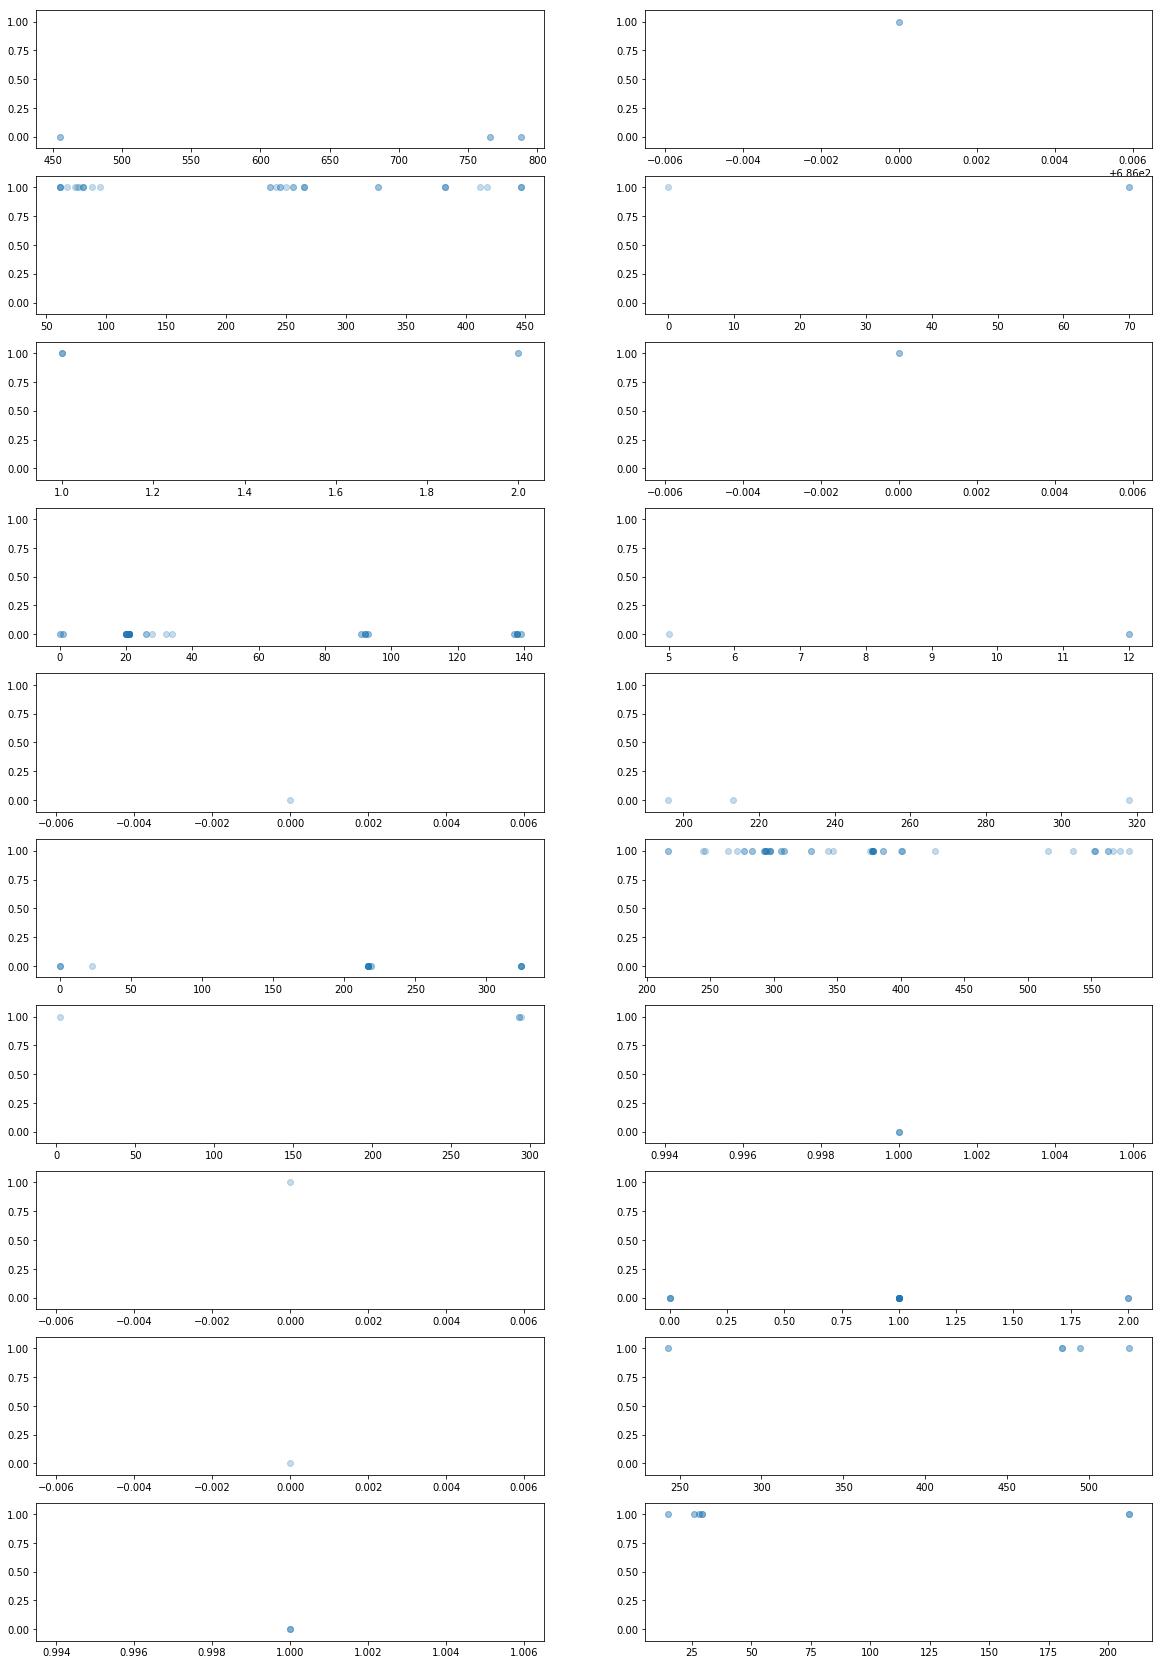

In [20]:
# ppl 별 구매 경향
plt.figure(figsize=(20,30))
for i, ppl in enumerate(df_merge.people_id.unique()[:20]):
    plt.subplot(10,2,i+1)    
    plt.scatter(df_merge[df_merge.people_id == ppl]['Past_days'], \
                df_merge[df_merge.people_id == ppl].outcome, alpha = 0.25) 
    plt.ylim(-0.1,1.1)
plt.show()

In [21]:
df_merge.people_id.value_counts().head()

294918.0    55103
370270.0    53668
105739.0    45936
54699.0     23969
64887.0      7052
Name: people_id, dtype: int64

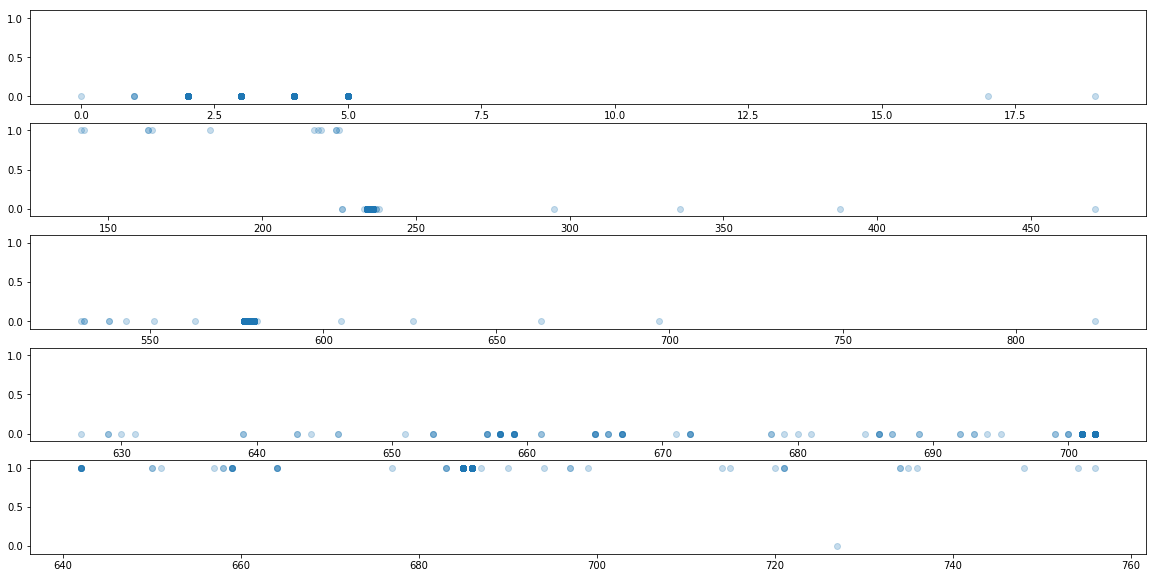

In [22]:
# ppl 별 구매 경향 top 5
plt.figure(figsize=(20,10))
for i, ppl in enumerate([294918, 370270, 105739, 54699, 64887]):
    plt.subplot(5,1,i+1)    
    plt.scatter(df_merge[df_merge.people_id == ppl]['Past_days'], \
                df_merge[df_merge.people_id == ppl].outcome, alpha = 0.25) 
    plt.ylim(-0.1,1.1)
plt.show()

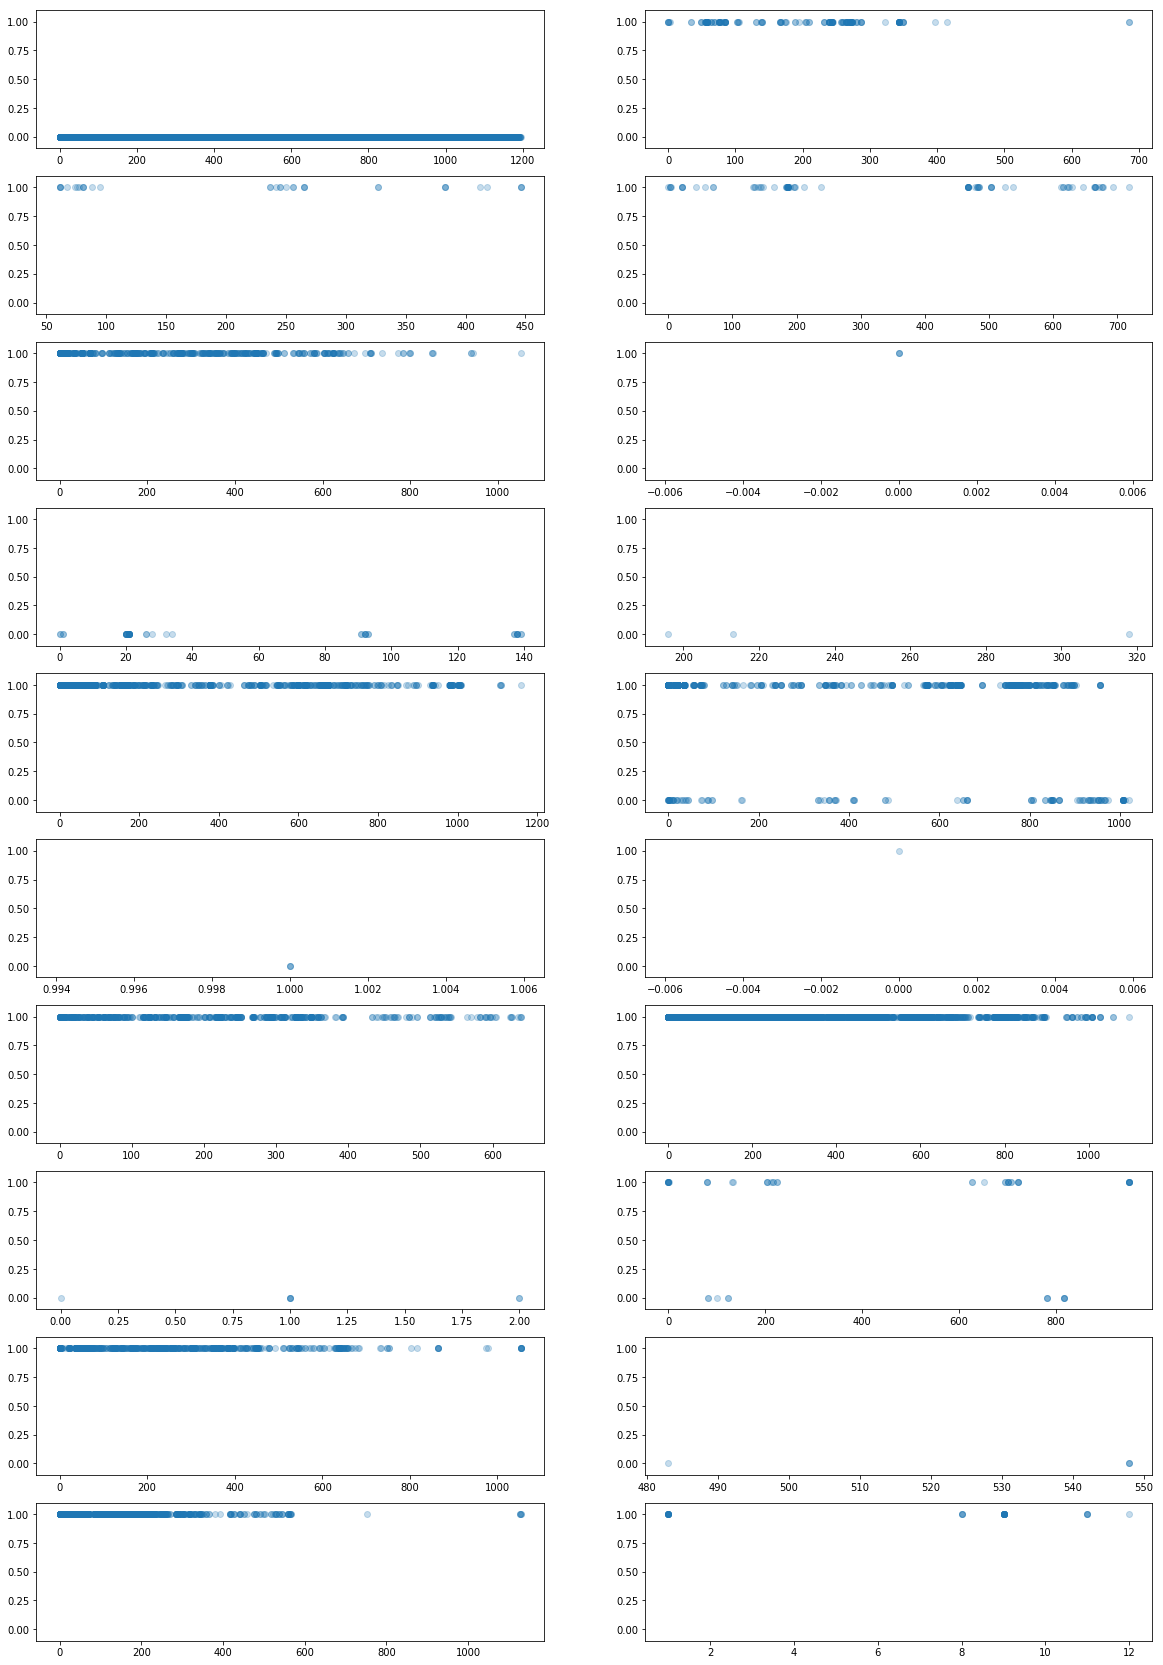

In [23]:
# group 별 구매 경향
plt.figure(figsize=(20,30))
for i, group in enumerate(df_merge.group_1.unique()[:20]):
    plt.subplot(10,2,i+1)    
    plt.scatter(df_merge[df_merge.group_1 == group]['Past_days'], \
                df_merge[df_merge.group_1 == group].outcome, alpha = 0.25) 
    plt.ylim(-0.1,1.1)
plt.show()

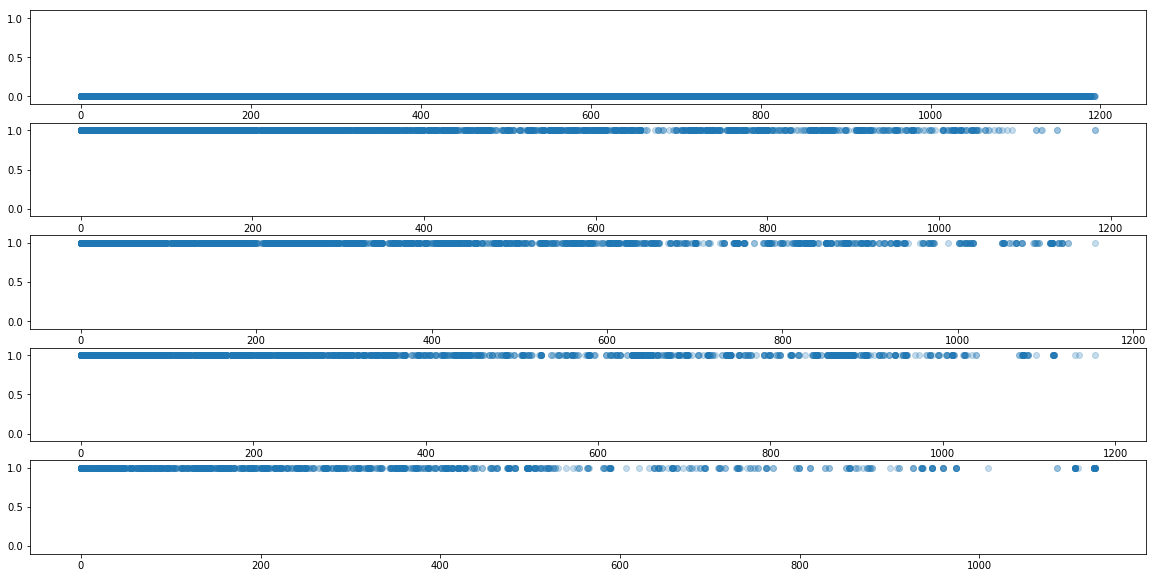

In [24]:
# group 별 구매 경향 top 5

plt.figure(figsize=(20,10))
for i, group in enumerate([17304, 667, 8386, 9280,450]):
    plt.subplot(5,1,i+1)    
    plt.scatter(df_merge[df_merge.group_1 == group]['Past_days'], \
                df_merge[df_merge.group_1 == group].outcome, alpha = 0.25) 
    plt.ylim(-0.1,1.1)
plt.show()

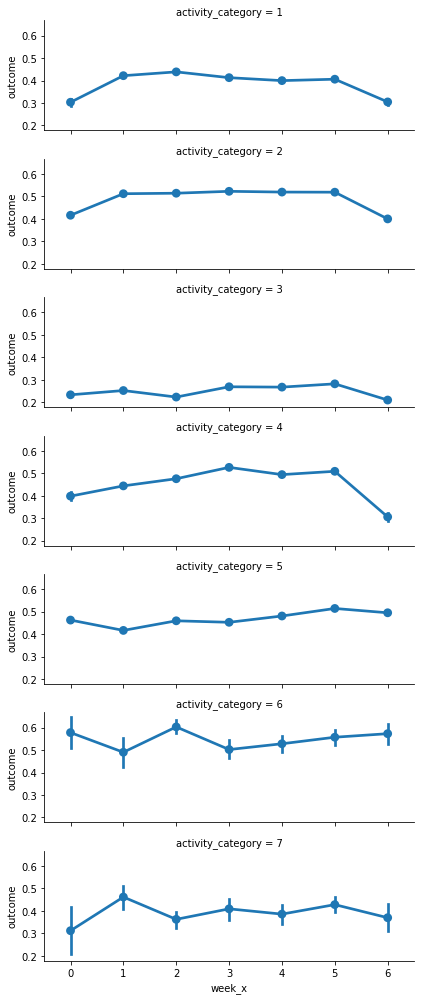

In [25]:
sns.factorplot(x="week_x", y="outcome", row="activity_category", data=df_merge,
               size=2, aspect=3, kind="point")
plt.show()

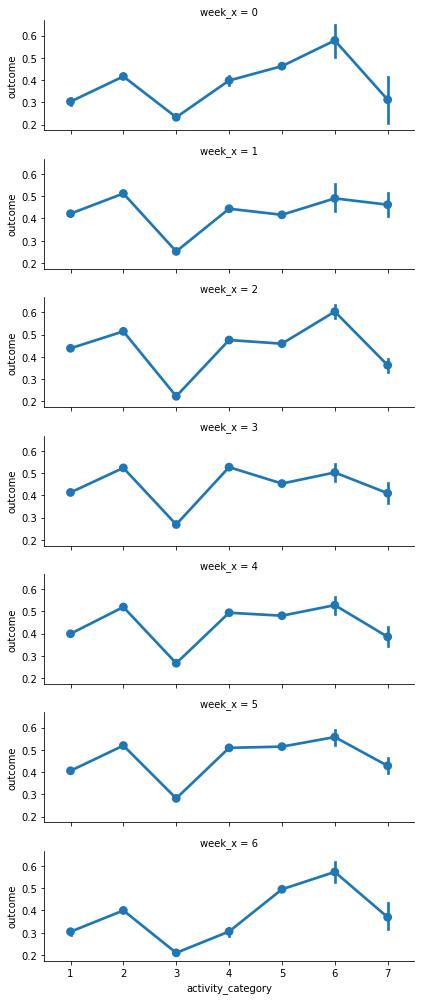

In [26]:
sns.factorplot(x="activity_category", y="outcome", row="week_x", data=df_merge,
               size=2, aspect=3, kind="point")
plt.show()

#### sample

In [27]:
df_sample = df_merge.sample(frac = 0.1, random_state=0).copy()
df_sample.fillna(0, inplace=True)
df_sample['sum'] = df_sample.iloc[:,-29:-1].sum(axis=1)

In [28]:
df_sample2 = df_merge.sample(frac = 0.1, random_state=1).copy()
df_sample2.fillna(0, inplace=True)
df_sample2['sum'] = df_sample2.iloc[:,-29:-1].sum(axis=1)

In [29]:
df_sample.groupby(['activity_id', 'activity_category']).count()

people_id  date_x  week_x  Past_days  char_1_x  \
activity_id activity_category                                                   
1           1                      15813   15813   15813      15813     15813   
2           2                      90498   90498   90498      90498     90498   
            3                      42804   42804   42804      42804     42804   
            4                      20891   20891   20891      20891     20891   
            5                      48968   48968   48968      48968     48968   
            6                        429     429     429        429       429   
            7                        326     326     326        326       326   

                               char_2_x  char_3_x  char_4_x  char_5_x  \
activity_id activity_category                                           
1           1                     15813     15813     15813     15813   
2           2                     90498     90498     90498     90498   
            3                     42804     42804     42804     42804   
            4                     20891     20891     20891     20891   
            5                     48968     48968     48968     48968   
            6                       429       429       429       429   
            7                       326       326       326       326   

                               char_6_x  char_7_x  char_8_x  char_9_x  \
activity_id activity_category                                           
1           1                     15813     15813     15813     15813   
2           2                     90498     90498     90498     90498   
            3                     42804     42804     42804     42804   
            4                     20891     20891     20891     20891   
            5                     48968     48968     48968     48968   
            6                       429       429       429       429   
            7                       326       326       326       326   

                               char_10_x  outcome  char_1_y  group_1  date_y  \
activity_id activity_category                                                  
1           1                      15813    15813     15813    15813   15813   
2           2                      90498    90498     90498    90498   90498   
            3                      42804    42804     42804    42804   42804   
            4                      20891    20891     20891    20891   20891   
            5                      48968    48968     48968    48968   48968   
            6                        429      429       429      429     429   
            7                        326      326       326      326     326   

                               week_y  char_2_y  char_3_y  char_4_y  char_5_y  \
activity_id activity_category                                                   
1           1                   15813     15813     15813     15813     15813   
2           2                   90498     90498     90498     90498     90498   
            3                   42804     42804     42804     42804     42804   
            4                   20891     20891     20891     20891     20891   
            5                   48968     48968     48968     48968     48968   
            6                     429       429       429       429       429   
            7                     326       326       326       326       326   

                               char_6_y  char_7_y  char_8_y  char_9_y  \
activity_id activity_category                                           
1           1                     15813     15813     15813     15813   
2           2                     90498     90498     90498     90498   
            3                     42804     42804     42804     42804   
            4                     20891     20891     20891     20891   
            5                     48968     48968     48968     48968   
            6          

In [30]:
df_sample_0 = df_sample[df_sample.outcome==0].copy()
df_sample_1 = df_sample[df_sample.outcome==1].copy()

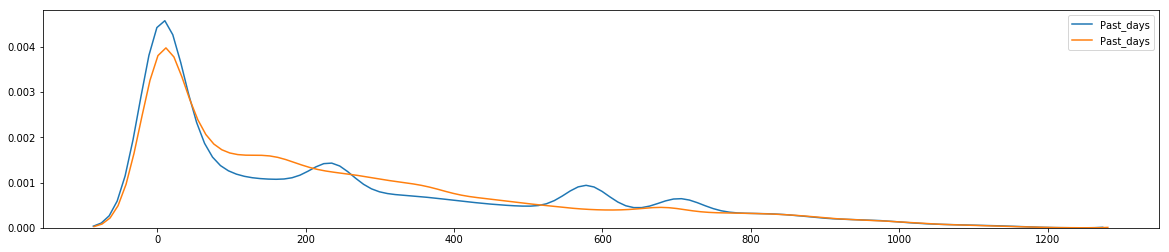

In [31]:
plt.figure(figsize=(20,4))
sns.kdeplot(df_sample_0['Past_days'])
sns.kdeplot(df_sample_1['Past_days'])
plt.show()

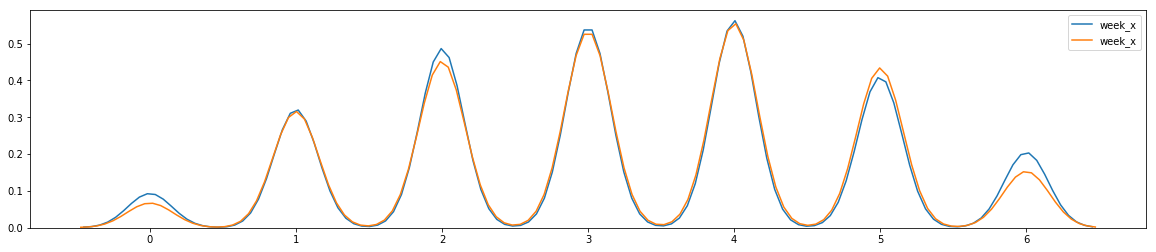

In [32]:
plt.figure(figsize=(20,4))
sns.kdeplot(df_sample_0['week_x'])
sns.kdeplot(df_sample_1['week_x'])
plt.show()

#### char_1_x ~ char_9_x

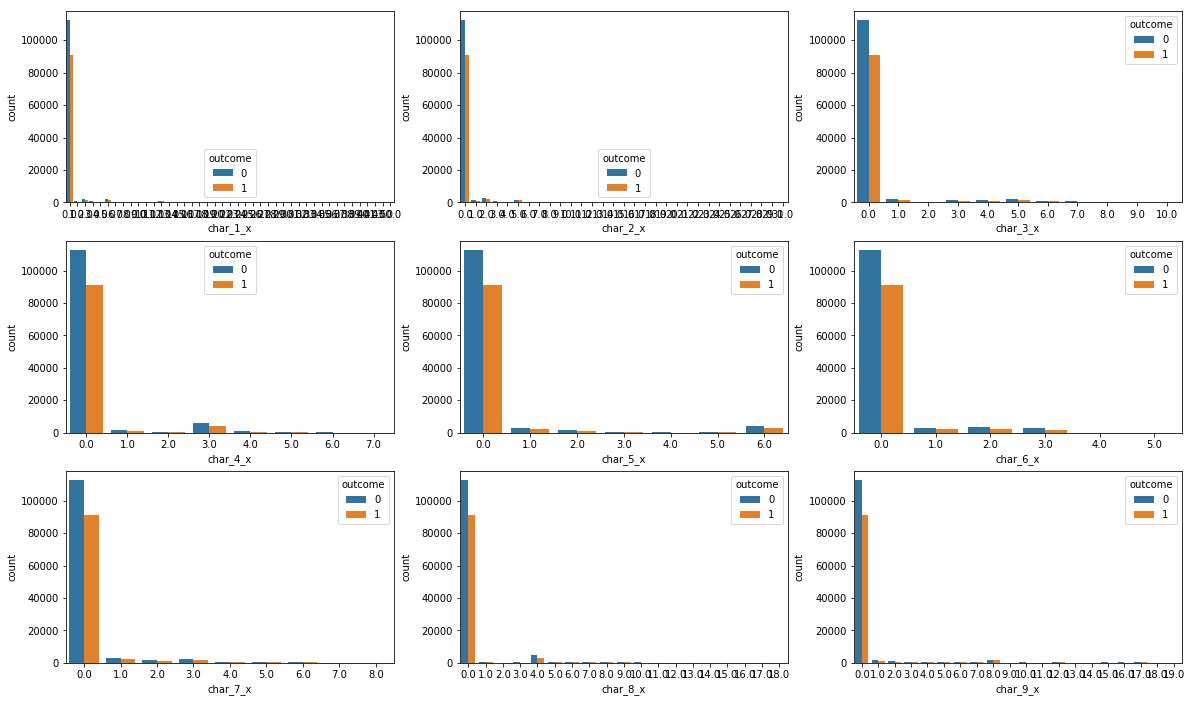

In [33]:
plt.figure(figsize=(20,12))
for i, feat in enumerate(df_sample.columns[6:15]):
    plt.subplot(3,3,i+1)
    sns.countplot(feat, hue='outcome', data=df_sample)
plt.show()

#### char_2_y ~ char_9_y

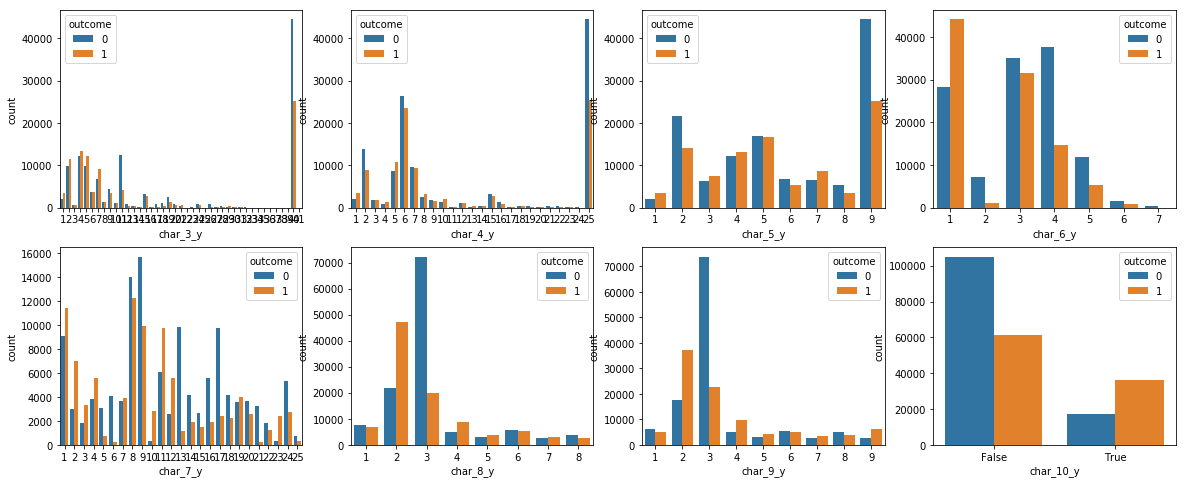

In [34]:
plt.figure(figsize=(20,8))
for i, feat in enumerate(df_sample.columns[-37:-29]):
    plt.subplot(2,4,i+1)
    sns.countplot(feat, hue='outcome', data=df_sample)
plt.show()

#### char_10_y ~ char_37

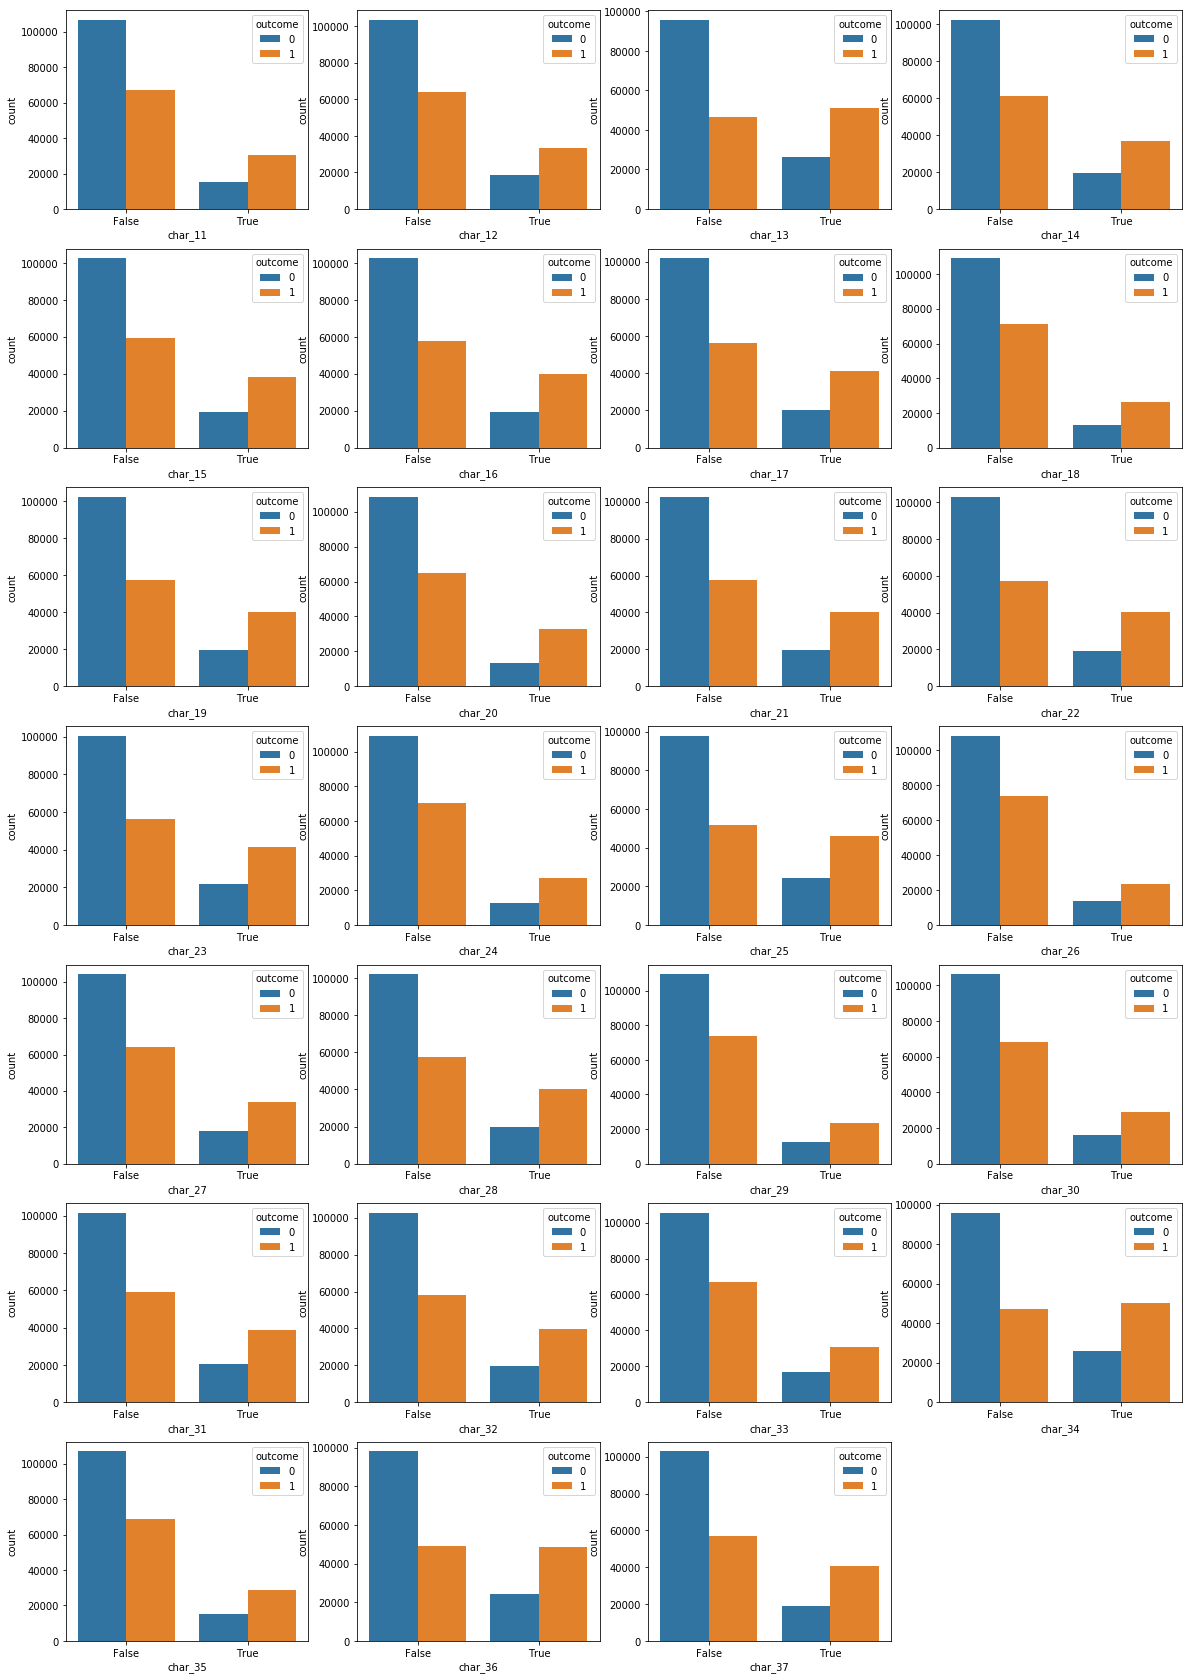

In [35]:
plt.figure(figsize=(20,30))
for i, feat in enumerate(df_sample.columns[-29:-2]):
    plt.subplot(7,4,i+1)
    sns.countplot(feat, hue='outcome', data=df_sample)
plt.show()

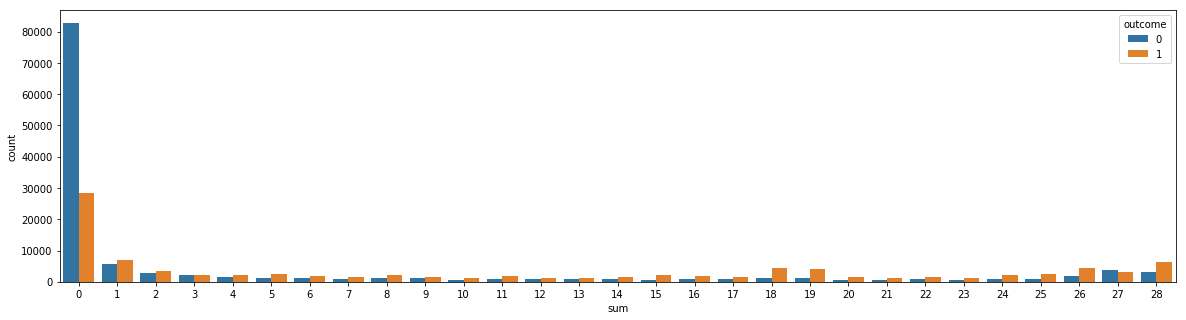

In [36]:
plt.figure(figsize=(20,5))
sns.countplot('sum', hue='outcome', data=df_sample)
plt.show()

#### char_38

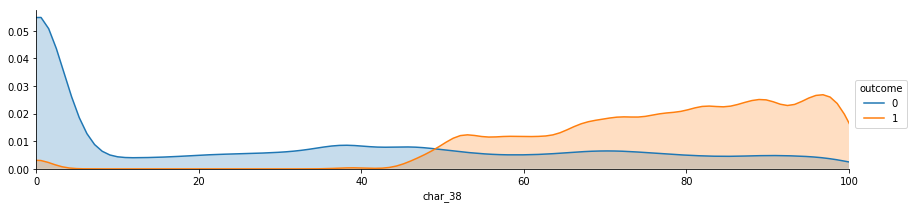

In [37]:
facet = sns.FacetGrid(df_sample, hue='outcome', aspect=4)
facet.map(sns.kdeplot, 'char_38', shade=True)
facet.set(xlim=(0, df_sample['char_38'].max()))
facet.add_legend()

plt.show()

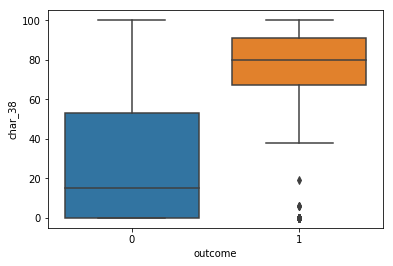

In [38]:
sns.boxplot(x="outcome", y="char_38", data=df_sample)
plt.show()

# feature selection

In [39]:
model1 = sm.OLS.from_formula("outcome ~ char_10_y + char_11 + char_12 + char_13 + char_14 + char_15 + char_16 + char_17 + char_18 + \
                            char_19 + char_20 + char_21 + char_22 + char_23 + char_24 + char_25 + char_26 + char_27 + char_28 + \
                            char_29 + char_30 + char_31 + char_32 + char_33 + char_34 + char_35 + char_36 + char_37", data=df_sample)
model2 = sm.OLS.from_formula("outcome ~ sum", data=df_sample)
model3 = sm.OLS.from_formula("outcome ~ char_10_y + char_11 + char_12 + char_13 + char_14 + char_15 + char_16 + char_17 + char_18 + \
                            char_19 + char_20 + char_21 + char_22 + char_23 + char_24 + char_25 + char_26 + char_27 + char_28 + char_29 + \
                            char_30 + char_31 + char_32 + char_33 + char_34 + char_35 + char_36 + char_37 + sum", data=df_sample)
result1 = model1.fit()
result2 = model2.fit()
result3 = model3.fit()

sm.stats.anova_lm(result1, result2, result3)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,219700.0,46857.157836,0.0,NaN,NaN,NaN
1,219727.0,48809.115099,-27.0,-1951.957263,338.846396,NaN
2,219700.0,46874.184717,27.0,1934.930383,335.890646,0.0


In [40]:
sm.stats.anova_lm(result1)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
char_10_y,1.0,3897.277449,3897.277449,18273.234976,0.000000e+00
char_11,1.0,351.633842,351.633842,1648.711930,0.000000e+00
char_12,1.0,127.622569,127.622569,598.386238,5.649735e-132
char_13,1.0,1416.133030,1416.133030,6639.848449,0.000000e+00
char_14,1.0,64.990676,64.990676,304.722951,3.427460e-68
char_15,1.0,34.372966,34.372966,161.165146,6.487422e-37
char_16,1.0,38.722422,38.722422,181.558519,2.299325e-41
char_17,1.0,58.783017,58.783017,275.616993,7.388177e-62
char_18,1.0,4.212364,4.212364,19.750585,8.827773e-06
char_19,1.0,1.880477,1.880477,8.817028,2.984646e-03


In [41]:
sm.stats.anova_lm(result2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
sum,1.0,5442.363904,5442.363904,24500.224828,0.0
Residual,219727.0,48809.115099,0.222135,NaN,NaN


In [42]:
sm.stats.anova_lm(result3)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
char_10_y,1.0,3897.277449,3897.277449,18266.597288,0.000000e+00
char_11,1.0,351.633842,351.633842,1648.113041,0.000000e+00
char_12,1.0,127.622569,127.622569,598.168877,6.297640e-132
char_13,1.0,1416.133030,1416.133030,6637.436548,0.000000e+00
char_14,1.0,64.990676,64.990676,304.612262,3.622874e-68
char_15,1.0,34.372966,34.372966,161.106604,6.681179e-37
char_16,1.0,38.722422,38.722422,181.492569,2.376772e-41
char_17,1.0,58.783017,58.783017,275.516876,7.768343e-62
char_18,1.0,4.212364,4.212364,19.743411,8.860971e-06
char_19,1.0,1.880477,1.880477,8.813825,2.989889e-03


# modeling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

## 로지스틱 회귀분석

In [43]:
df_sample.keys()

Index(['people_id', 'activity_id', 'date_x', 'week_x', 'Past_days',
       'activity_category', 'char_1_x', 'char_2_x', 'char_3_x', 'char_4_x',
       'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x', 'char_10_x',
       'outcome', 'char_1_y', 'group_1', 'date_y', 'week_y', 'char_2_y',
       'char_3_y', 'char_4_y', 'char_5_y', 'char_6_y', 'char_7_y', 'char_8_y',
       'char_9_y', 'char_10_y', 'char_11', 'char_12', 'char_13', 'char_14',
       'char_15', 'char_16', 'char_17', 'char_18', 'char_19', 'char_20',
       'char_21', 'char_22', 'char_23', 'char_24', 'char_25', 'char_26',
       'char_27', 'char_28', 'char_29', 'char_30', 'char_31', 'char_32',
       'char_33', 'char_34', 'char_35', 'char_36', 'char_37', 'char_38',
       'sum'],
      dtype='object')

In [44]:
logit_mod = sm.Logit.from_formula("outcome ~ Past_days + char_38 + sum", data=df_sample)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:               219729
Model:                          Logit   Df Residuals:                   219725
Method:                           MLE   Df Model:                            3
Date:                Mon, 13 Nov 2017   Pseudo R-squ.:                  0.4089
Time:                        04:39:17   Log-Likelihood:                -89220.
converged:                       True   LL-Null:                   -1.5094e+05
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6454      0.018   -201.199      0.000      -3.681      -3.610
Past_days     -0.0001   2.17e-05     -6.096      0.000      -0.000   -8.98e-05
char_38        0.0625      0.000    232.311      0.0

## 나이브 베이즈

+ 베르누이 분포 나이브 베이즈 모형

In [45]:
df_sample.columns[-30:-2]

Index(['char_10_y', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37'],
      dtype='object')

In [46]:
X = df_sample[df_sample.columns[-30:-2]]; y = df_sample.outcome

In [47]:
from sklearn.naive_bayes import BernoulliNB
clf_bern = BernoulliNB().fit(X, y)

In [48]:
print(classification_report(df_sample2.outcome, clf_bern.predict(df_sample2[df_sample2.columns[-30:-2]])))

             precision    recall  f1-score   support

          0       0.67      0.80      0.73    121787
          1       0.67      0.50      0.57     97942

avg / total       0.67      0.67      0.66    219729



+ 가우시안 정규 분포 나이브 베이즈 모형

In [49]:
# 0.82
a = list(df_sample.columns[:2]) + list(df_sample.columns[3:16]) + list(df_sample.columns[17:19]) + list(df_sample.columns[-39:-1])

In [50]:
print(a)

['people_id', 'activity_id', 'week_x', 'Past_days', 'activity_category', 'char_1_x', 'char_2_x', 'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x', 'char_10_x', 'char_1_y', 'group_1', 'week_y', 'char_2_y', 'char_3_y', 'char_4_y', 'char_5_y', 'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y', 'char_10_y', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36', 'char_37', 'char_38']


In [51]:
# 0.73
a2 = list(df_sample.columns[:2]) + list(df_sample.columns[3:16]) + list(df_sample.columns[17:19]) + list(df_sample.columns[-39:-30]) + list(df_sample.columns[-1:])

In [52]:
print(a2)

['people_id', 'activity_id', 'week_x', 'Past_days', 'activity_category', 'char_1_x', 'char_2_x', 'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x', 'char_10_x', 'char_1_y', 'group_1', 'week_y', 'char_2_y', 'char_3_y', 'char_4_y', 'char_5_y', 'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y', 'sum']


In [53]:
from sklearn.naive_bayes import GaussianNB
X = df_sample[a]; y = df_sample.outcome
clf_norm = GaussianNB().fit(X, y)

In [54]:
confusion_matrix(df_sample2.outcome, clf_norm.predict(df_sample2[a]))

array([[93352, 28435],
       [11127, 86815]], dtype=int64)

In [55]:
print(classification_report(df_sample2.outcome, clf_norm.predict(df_sample2[a])))

             precision    recall  f1-score   support

          0       0.89      0.77      0.83    121787
          1       0.75      0.89      0.81     97942

avg / total       0.83      0.82      0.82    219729



## 의사 결정 나무

In [56]:
tree = DecisionTreeClassifier(criterion='entropy').fit(df_sample[a], df_sample.outcome)
print(classification_report(df_sample2.outcome, tree.predict(df_sample2[a])))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96    121787
          1       0.96      0.95      0.96     97942

avg / total       0.96      0.96      0.96    219729



In [57]:
tree2 = DecisionTreeClassifier(criterion='entropy').fit(df_sample[a2], df_sample.outcome)
print(classification_report(df_sample2.outcome, tree2.predict(df_sample2[a2])))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96    121787
          1       0.95      0.95      0.95     97942

avg / total       0.96      0.96      0.96    219729



## 랜덤 포레스트

+ RandomForestClassifier

In [58]:
rfc = RandomForestClassifier(n_estimators=10).fit(df_sample[a], df_sample.outcome)
print(classification_report(df_sample2.outcome, rfc.predict(df_sample2[a])))

             precision    recall  f1-score   support

          0       0.97      0.96      0.97    121787
          1       0.95      0.96      0.96     97942

avg / total       0.96      0.96      0.96    219729



In [59]:
rfc = RandomForestClassifier(n_estimators=20).fit(df_sample[a], df_sample.outcome)
print(classification_report(df_sample2.outcome, rfc.predict(df_sample2[a])))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97    121787
          1       0.95      0.97      0.96     97942

avg / total       0.97      0.97      0.97    219729



In [60]:
rfc = RandomForestClassifier(n_estimators=50).fit(df_sample[a], df_sample.outcome)
print(classification_report(df_sample2.outcome, rfc.predict(df_sample2[a])))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97    121787
          1       0.95      0.98      0.96     97942

avg / total       0.97      0.97      0.97    219729



In [61]:
rfc = RandomForestClassifier(n_estimators=30).fit(df_sample[a], df_sample.outcome)
print(classification_report(df_sample2.outcome, rfc.predict(df_sample2[a])))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97    121787
          1       0.95      0.97      0.96     97942

avg / total       0.97      0.97      0.97    219729



In [62]:
rfc = RandomForestClassifier(n_estimators=30).fit(df_sample[a2], df_sample.outcome)
print(classification_report(df_sample2.outcome, rfc.predict(df_sample2[a2])))

             precision    recall  f1-score   support

          0       0.98      0.95      0.96    121787
          1       0.94      0.97      0.96     97942

avg / total       0.96      0.96      0.96    219729



+ ExtraTreesClassifier

In [63]:
efc = ExtraTreesClassifier(n_estimators=30).fit(df_sample[a], df_sample.outcome)
print(classification_report(df_sample2.outcome, efc.predict(df_sample2[a])))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97    121787
          1       0.95      0.97      0.96     97942

avg / total       0.97      0.97      0.97    219729



In [64]:
efc = ExtraTreesClassifier(n_estimators=30).fit(df_sample[a2], df_sample.outcome)
print(classification_report(df_sample2.outcome, efc.predict(df_sample2[a2])))

             precision    recall  f1-score   support

          0       0.98      0.95      0.96    121787
          1       0.94      0.97      0.95     97942

avg / total       0.96      0.96      0.96    219729



# xgboost

In [65]:
import xgboost

xgb = xgboost.XGBClassifier(n_estimators=30).fit(df_sample[a], df_sample.outcome)
print(classification_report(df_sample2.outcome, xgb.predict(df_sample2[a])))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


             precision    recall  f1-score   support

          0       0.98      0.74      0.85    121787
          1       0.75      0.98      0.85     97942

avg / total       0.88      0.85      0.85    219729



In [66]:
xgb = xgboost.XGBClassifier(n_estimators=30).fit(df_sample[a2], df_sample.outcome)
print(classification_report(df_sample2.outcome, xgb.predict(df_sample2[a2])))

             precision    recall  f1-score   support

          0       0.98      0.72      0.83    121787
          1       0.74      0.98      0.84     97942

avg / total       0.87      0.84      0.83    219729

